<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/).

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models. Our Jupyter notebook platforms have a built-in Tidyverse, Tidymodels and rlang packages so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.



In [1]:
# Install tidymodels if you haven't done so
#install.packages("rlang") #repos='http://cran.us.r-project.org')
#install.packages("tidymodels", dependencies=FALSE) #, repos='http://cran.us.r-project.org')

# Additional package for grouping graphs together
#install.packages("cowplot", dependencies=FALSE) #, repos='http://cran.us.r-project.org')
print("Packages installed!")

[1] "Packages installed!"


**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [2]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

# Load cowplot and glmnet
library(cowplot)
library(glmnet)

print("Packages loaded!")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ stringr 1.5.0     
── Conflict

[1] "Packages loaded!"



### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure).

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html)

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [3]:
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"
download.file(url, destfile="noaa-weather-sample-data.tar.gz")

Untar the zipped file.


In [4]:
untar("noaa-weather-sample-data.tar.gz", tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”


<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [5]:
df <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv", show_col_types=FALSE)

Next, display the first few rows of the dataframe.


In [6]:
head(df)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [7]:
glimpse(df)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 2013…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19, …
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [8]:
sub_df <- select(df, c('HOURLYRelativeHumidity', 'HOURLYDRYBULBTEMPF',
                       'HOURLYPrecip', 'HOURLYWindSpeed', 'HOURLYStationPressure')
                 )

Show the first 10 rows of this new dataframe.


In [9]:
head(sub_df, n=10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow.

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [10]:
unique(sub_df$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters.

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [11]:
sub_df$HOURLYPrecip[sub_df$HOURLYPrecip == "T"] <- "0.0"
str_remove(sub_df$HOURLYPrecip, pattern = "s$")
#sub_df<- sub_df%>% replace_na(list(HOURLYPrecip = "0"))
#sub_df <- sub_df[complete.cases(sub_df),]
#head(sub_df, n=10)
unique(sub_df$HOURLYPrecip)

[1] "0.00" "0.00" "0.00" "0.00" "0.0"  "0.00" "0.00" "0.00" "0.06" NA    
  [11] NA     "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" NA     "0.03" NA    
  [21] "0.03" NA     "0.00" "0.00" "0.02" NA     "0.00" NA     "0.0"  "0.00"
  [31] "0.00" NA     "0.00" "0.00" "0.00" NA     "0.00" "0.00" "0.08" NA    
  [41] "0.0"  NA     NA     "0.00" "0.00" "0.00" "0.01" "0.00" "0.0"  NA    
  [51] "0.00" "0.00" NA     "0.00" "0.00" NA     "0.00" "0.00" "0.00" "0.00"
  [61] "0.00" NA     NA     "0.0"  "0.00" NA     "0.00" "0.00" NA     "0.00"
  [71] "0.00" "0.00" "0.07" NA     "0.00" NA     "0.00" "0.00" NA     NA    
  [81] "0.00" "0.0"  "0.0"  "0.00" "0.00" NA     "0.00" NA     NA     "0.00"
  [91] NA     NA     "0.00" "0.00" "0.0"  "0.00" "0.16" "0.00" "0.00" "0.00"
 [101] "0.00" "0.08" "0.00" "0.00" "0.00" NA     "0.00" "0.00" NA     NA    
 [111] NA     NA     "0.00" "0.0"  NA     "0.00" "0.00" "0.00" "0.09" "0.06"
 [121] "0.0"  "0.00" "0.00" NA     NA     "0.00" "0.00" NA     NA     "0.00"
 [131] "0.00" "0.00" "0.00" "0.00" NA     "0.00" "0.00" "0.00" "0.00" "0.00"
 [141] NA     "0.00" NA     "0.00" NA     "0.22" "0.00" NA     "0.00" NA    
 [151] "0.02" NA     NA     "0.00" "0.00" "0.00" NA     "0.00" NA     NA    
 [161] NA     NA     NA     NA     "0.0"  "0.02" "0.00" "0.00" "0.00" NA    
 [171] "0.0"  "0.00" "0.00" "0.0"  "0.00" "0.00" "0.00" NA     "0.01" "0.00"
 [181] "0.00" NA     NA     "0.00" NA     "0.0"  "0.00" NA     "0.00" "0.00"
 [191] "0.00" "0.00" "0.24" NA     "0.00" "0.03" NA     "0.00" NA     "0.00"
 [201] "0.00" "0.00" "0.00" "0.00" NA     "0.00" NA     "0.00" "0.00" "0.00"
 [211] "0.0"  NA     "0.00" NA     "0.0"  "0.00" "0.00" "0.00" NA     "0.00"
 [221] "0.00" "0.00" "0.00" "0.00" "0.00" NA     "0.00" "0.00" "0.00" "0.03"
 [231] "0.00" NA     NA     "0.00" "0.00" NA     "0.00" NA     "0.00" NA    
 [241] NA     NA     "0.00" "0.00" "0.00" "0.00" NA     "0.00" "0.00" NA    
 [251] "0.0"  NA     "0.00" "0.00" "0.01" "0.0"  "0.00" NA     "0.00" "0.00"
 [261] "0.00" NA     "0.00" NA     NA     "0.00" NA     "0.00" NA     "0.00"
 [271] "0.00" "0.00" NA     "0.00" "0.00" NA     NA     "0.00" NA     NA    
 [281] "0.18" "0.00" "0.00" "0.00" NA     "0.00" "0.00" "0.0"  "0.00" "0.03"
 [291] "0.00" "0.0"  NA     NA     "0.00" "0.00" NA     NA     "0.05" "0.00"
 [301] "0.03" "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" NA     "0.0"  "0.00"
 [311] "0.0"  "0.00" NA     "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" NA    
 [321] NA     "0.00" "0.00" "0.0"  "0.00" "0.00" "0.00" NA     "0.00" NA    
 [331] NA     NA     NA     "0.00" "0.00" "0.00" "0.06" "0.00" "0.00" NA    
 [341] NA     NA     "0.00" "0.00" "0.00" "0.00" NA     "0.00" "0.00" "0.0" 
 [351] NA     "0.0"  NA     "0.00" "0.0"  "0.00" "0.00" "0.01" "0.00" NA    
 [361] "0.06" "0.00" NA     "0.00" "0.00" "0.04" "0.09" "0.00" "0.00" "0.00"
 [371] "0.00" "0.00" "0.00" NA     NA     NA     NA     "0.00" NA     "0.00"
 [381] "0.00" NA     NA     "0.00" "0.0"  "0.00" "0.00" "0.00" "0.00" NA    
 [391] NA     NA     "0.00" NA     "0.00" "0.00" "0.00" "0.00" "0.00" "0.00"
 [401] NA     "0.00" "0.00" "0.07" "0.0"  NA     "0.11" "0.00" "0.00" NA    
 [411] "0.0"  "0.00" "0.00" "0.00" "0.00" "0.00" NA     NA     "0.00" NA    
 [421] "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" NA     "0.00"
 [431] "0.00" NA     "0.00" "0.00" NA     "0.00" NA     "0.00" "0.00" "0.00"
 [441] "0.00" NA     "0.00" NA     NA     "0.00" "0.00" "0.00" "0.0"  NA    
 [451] NA     "0.00" "0.00" NA     NA     "0.00" "0.00" NA     "0.00" "0.00"
 [461] NA     NA     "0.00" "0.09" NA     "0.00" "0.00" NA     NA     NA    
 [471] "0.06" NA     "0.00" NA     "0.00" NA     "0.00" "0.00" "0.00" "0.01"
 [481] NA     "0.00" "0.01" "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" "0.00"
 [491] "0.00" NA     "0.00" "0.00" "0.0"  NA     "0.00" "0.00" "0.00" "0.00"
 [501] NA     "0.00" "0.00" "0.00" NA     "0.0"  NA     NA     "0.01" "0.00"
 [511] "0.00" "0.00" "0.0"  "0.00" "0.00" "0.00" NA     NA     "0.00" "0.00"

[1] "0.00"  "0.0"   "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [12]:
glimpse(sub_df)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00", …
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [13]:
sub_df$HOURLYPrecip <- as.numeric(sub_df$HOURLYPrecip)
unique(sub_df$HOURLYPrecip)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] 0.00 0.06   NA 0.03 0.02 0.08 0.01 0.07 0.16 0.09 0.22 0.24 0.18 0.05 0.04
[16] 0.11 0.14 0.25 0.10 0.58 0.12 0.13 0.46 1.07 1.19 0.34 0.20 0.42 0.17 0.27
[31] 0.35 0.31 0.33 0.23 0.26 0.28 0.75 0.19 0.36 0.54 0.59 0.21

We can now see that all fields have numerical data type.


In [14]:
sub_df <- sub_df[complete.cases(sub_df),]
glimpse(sub_df)

Rows: 4,050
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, 1…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [15]:
unique(sub_df$HOURLYPrecip)

[1] 0.00 0.06 0.03 0.02 0.08 0.01 0.07 0.16 0.09 0.22 0.24 0.18 0.05 0.04 0.11
[16] 0.14 0.25 0.10 0.58 0.12 0.13 0.46 1.07 1.19 0.34 0.20 0.42 0.17 0.27 0.35
[31] 0.31 0.33 0.23 0.26 0.28 0.75 0.19 0.36 0.54 0.59 0.21

<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [16]:
colnames(sub_df) <- c('relative_humidity', 'dry_bulb_temp_f', 'precip', 'wind_speed', 'station_pressure')

In [17]:
glimpse(sub_df)

Rows: 4,050
Columns: 5
$ relative_humidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47, 84, …
$ dry_bulb_temp_f   <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78, 75, …
$ precip            <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.06…
$ wind_speed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, 11, 13…
$ station_pressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40, 30.…


<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [18]:
set.seed(1234)
weather_split <- initial_split(sub_df, prop=0.8)
training_data <- training(weather_split)
testing_data <- testing(weather_split)

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


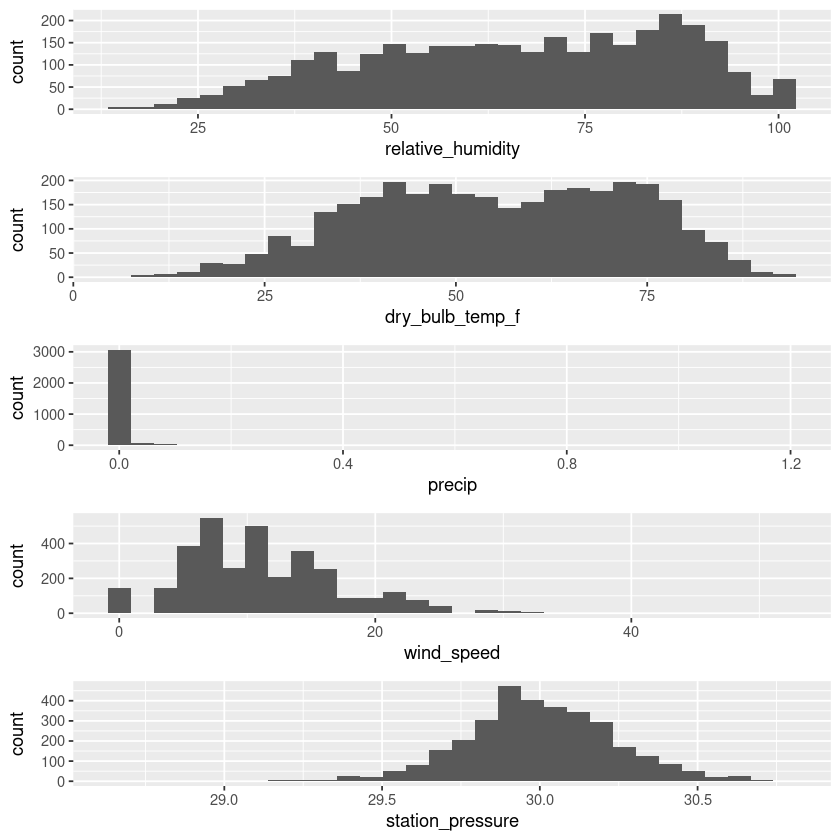

In [19]:
plot1 <- ggplot(training_data, aes(x=relative_humidity) ) + geom_histogram()
plot2 <- ggplot(training_data, aes(x=dry_bulb_temp_f) ) + geom_histogram()
plot3 <- ggplot(training_data, aes(x=precip) ) + geom_histogram()
plot4 <- ggplot(training_data, aes(x=wind_speed) ) + geom_histogram()
plot5 <- ggplot(training_data, aes(station_pressure) ) + geom_histogram()

suppressWarnings( plot_grid(plot1, plot2, plot3, plot4, plot5, ncol = 1, nrow=5, align="hv") )

<a id="cell8"></a>
## 8. Linear Regression
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models.
Additionally, visualize each simple model with a scatter plot.


### 8.1 Precipitation ~ Relative Humidity

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.021151308,2.649108e-03,-7.984314,1.944779e-15
relative_humidity,0.000421776,3.833256e-05,11.003074,1.134770e-27


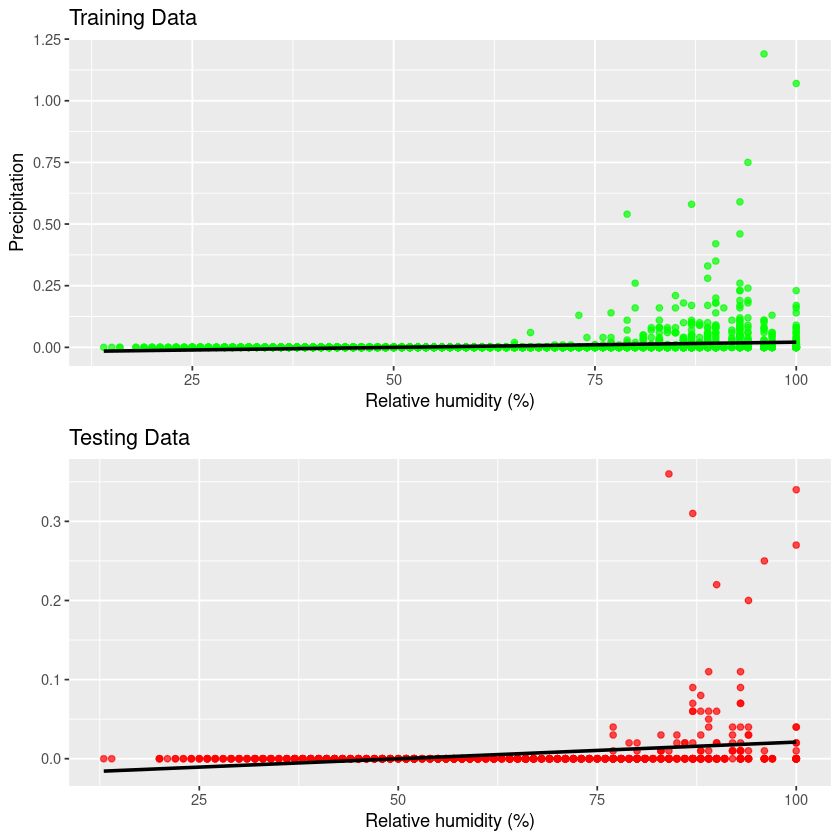

In [20]:
train_fit1 <- lm(formula = precip ~ relative_humidity, data = training_data)

#train_fit1$coefficients
summary(train_fit1)$coefficients
intercept1 <- summary(train_fit1)$coefficients[1]
coeff1 <- summary(train_fit1)$coefficients[2]

lmTrain_df1 <- data.frame(relative_humidity = training_data$relative_humidity,
                     precip = training_data$precip,
                     precip_predict = predict(train_fit1)
                     )

ggTrain_plot1 <- ggplot(lmTrain_df1) +
                 geom_point(aes(x=relative_humidity, y=precip),
                            colour='green', alpha=0.7) +
                 geom_line( aes(x=relative_humidity, y=precip_predict),
                           colour='black', linewidth=1 ) +
                 labs(x='Relative humidity (%)', y='Precipitation',
                      title='Training Data')

test_results1 <- testing_data$relative_humidity * coeff1 + intercept1
lmTest_df1 <- data.frame(relative_humidity = testing_data$relative_humidity,
                         precip = testing_data$precip,
                         precip_predict = test_results1
                        )

ggTest_plot1 <- ggplot(lmTest_df1) +
                geom_point(aes(x=relative_humidity, y=precip),
                           colour='red', alpha=0.7) +
                geom_line( aes(x=relative_humidity, y=precip_predict),
                           colour='black', linewidth=1) +
                labs(x='Relative humidity (%)', y='',
                      title='Testing Data')

suppressWarnings( plot_grid(ggTrain_plot1, ggTest_plot1, ncol = 1, nrow=2, align='hv') )

In [21]:
print("R-squared score on training data for Precipitation ~ Relative Humidity")
rsq(lmTrain_df1, truth=precip, estimate=precip_predict)

print("R-squared score on testing data for Precipitation ~ Relative Humidity")
rsq(lmTest_df1, truth=precip, estimate=precip_predict)

[1] "R-squared score on training data for Precipitation ~ Relative Humidity"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.03604203


[1] "R-squared score on testing data for Precipitation ~ Relative Humidity"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.05095142


### 8.2 Precipitation ~ Dry Bulb Temperature

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.326887e-03,2.591399e-03,1.6697111,0.09507319
dry_bulb_temp_f,4.427595e-05,4.473907e-05,0.9896484,0.32241996


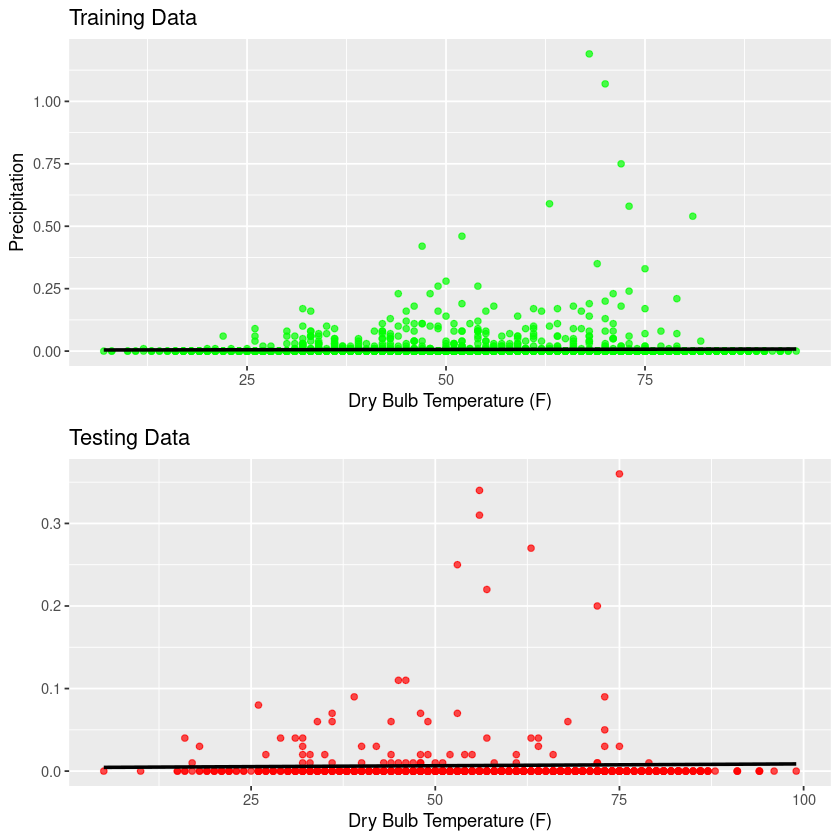

In [22]:
train_fit2 <- lm(formula = precip ~ dry_bulb_temp_f, data = training_data)

#train_fit1$coefficients
summary(train_fit2)$coefficients
intercept2 <- summary(train_fit2)$coefficients[1]
coeff2 <- summary(train_fit2)$coefficients[2]

lmTrain_df2 <- data.frame(dry_bulb_temp_f = training_data$dry_bulb_temp_f,
                     precip = training_data$precip,
                     precip_predict = predict(train_fit2)
                     )

ggTrain_plot2 <- ggplot(lmTrain_df2) +
                 geom_point(aes(x=dry_bulb_temp_f, y=precip),
                            colour='green', alpha=0.7) +
                 geom_line( aes(x=dry_bulb_temp_f, y=precip_predict),
                           colour='black', linewidth=1 ) +
                 labs(x='Dry Bulb Temperature (F)', y='Precipitation',
                      title='Training Data')

test_results2 <- testing_data$dry_bulb_temp_f * coeff2 + intercept2
lmTest_df2 <- data.frame(dry_bulb_temp_f = testing_data$dry_bulb_temp_f,
                         precip = testing_data$precip,
                         precip_predict = test_results2
                        )

ggTest_plot2 <- ggplot(lmTest_df2) +
                geom_point(aes(x=dry_bulb_temp_f, y=precip),
                           colour='red', alpha=0.7) +
                geom_line( aes(x=dry_bulb_temp_f, y=precip_predict),
                           colour='black', linewidth=1) +
                labs(x='Dry Bulb Temperature (F)', y='',
                      title='Testing Data')

suppressWarnings( plot_grid(ggTrain_plot2, ggTest_plot2, ncol = 1, nrow=2, align='hv') )

In [23]:
print("R-squared score on training data for Precipitation ~ Dry Bulb Temperature")
rsq(lmTrain_df2, truth=precip, estimate=precip_predict)

print("R-squared score on testing data for Precipitation ~ Dry Bulb Temperature")
rsq(lmTest_df2, truth=precip, estimate=precip_predict)

[1] "R-squared score on training data for Precipitation ~ Dry Bulb Temperature"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.0003023804


[1] "R-squared score on testing data for Precipitation ~ Dry Bulb Temperature"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.000355124


### 8.3 Precipitation ~ Wind Speed

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.0004100668,0.0015991571,0.2564268,7.976376e-01
wind_speed,0.0005697617,0.0001254338,4.5423297,5.766666e-06


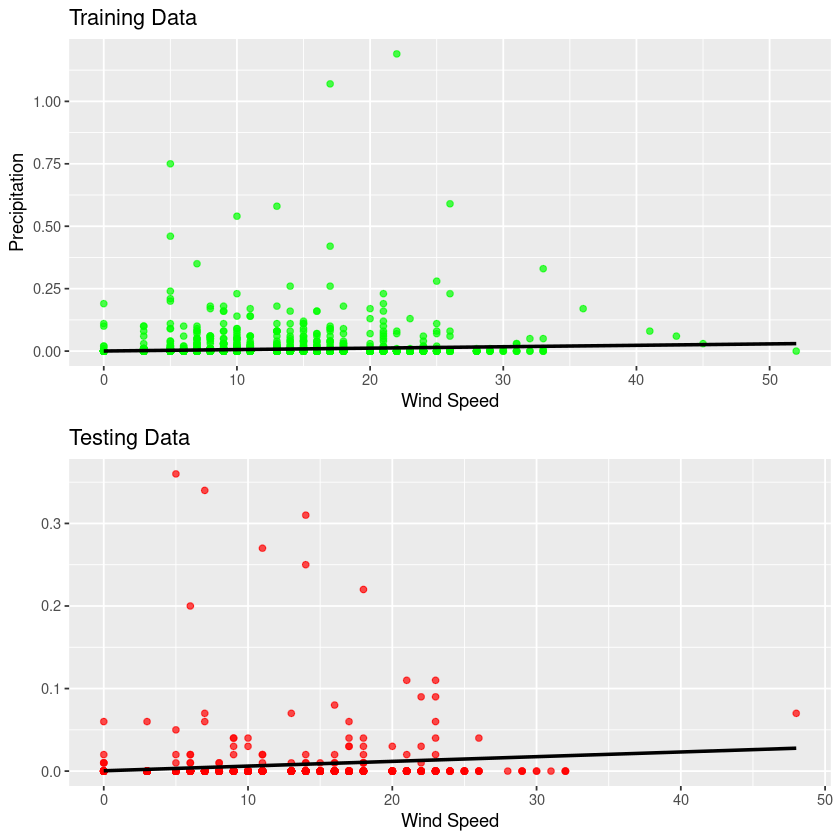

In [24]:
train_fit3 <- lm(formula = precip ~ wind_speed, data = training_data)

#train_fit1$coefficients
summary(train_fit3)$coefficients
intercept3 <- summary(train_fit3)$coefficients[1]
coeff3 <- summary(train_fit3)$coefficients[2]

lmTrain_df3 <- data.frame(wind_speed = training_data$wind_speed,
                     precip = training_data$precip,
                     precip_predict = predict(train_fit3)
                     )

ggTrain_plot3 <- ggplot(lmTrain_df3) +
                 geom_point(aes(x=wind_speed, y=precip),
                            colour='green', alpha=0.7) +
                 geom_line( aes(x=wind_speed, y=precip_predict),
                           colour='black', linewidth=1 ) +
                 labs(x='Wind Speed', y='Precipitation',
                      title='Training Data')

test_results3 <- testing_data$wind_speed * coeff3 + intercept3
lmTest_df3 <- data.frame(wind_speed = testing_data$wind_speed,
                         precip = testing_data$precip,
                         precip_predict = test_results3
                        )

ggTest_plot3 <- ggplot(lmTest_df3) +
                geom_point(aes(x=wind_speed, y=precip),
                           colour='red', alpha=0.7) +
                geom_line( aes(x=wind_speed, y=precip_predict),
                           colour='black', linewidth=1) +
                labs(x='Wind Speed', y='',
                      title='Testing Data')

suppressWarnings( plot_grid(ggTrain_plot3, ggTest_plot3, ncol = 1, nrow=2, align='hv') )

In [25]:
print("R-squared score on training data for Precipitation ~ Wind Speed")
rsq(lmTrain_df3, truth=precip, estimate=precip_predict)

print("R-squared score on testing data for Precipitation ~ Wind Speed")
rsq(lmTest_df3, truth=precip, estimate=precip_predict)

[1] "R-squared score on training data for Precipitation ~ Wind Speed"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.006331723


[1] "R-squared score on testing data for Precipitation ~ Wind Speed"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.00167055


### 8.4 Precipitation ~ Station Pressure

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.74044309,0.095855445,7.724580,1.485773e-14
station_pressure,-0.02445667,0.003195217,-7.654149,2.551054e-14


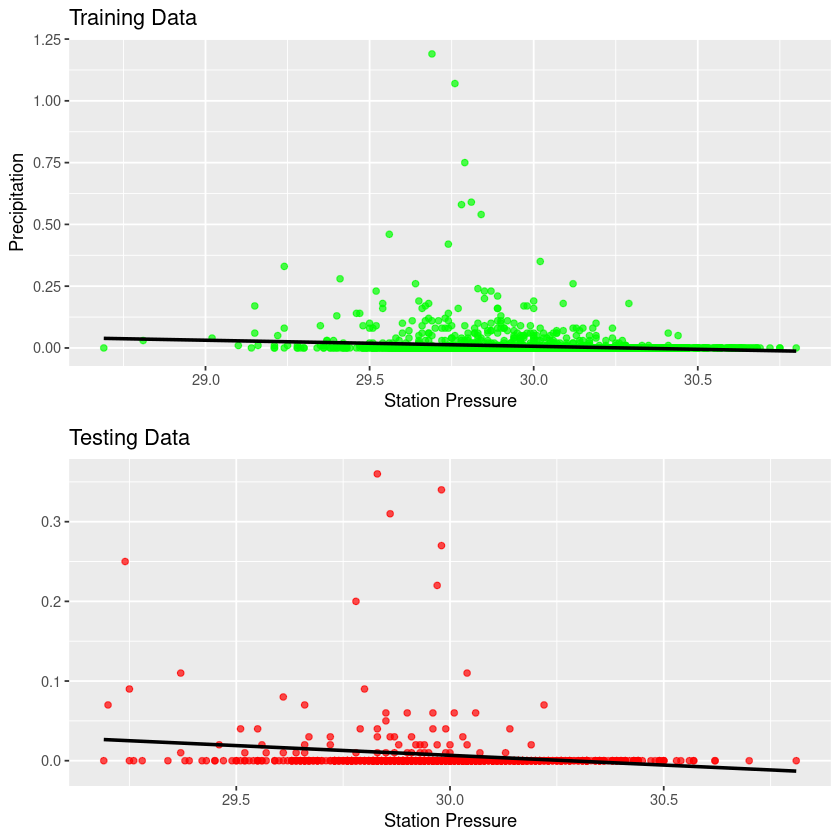

In [26]:
train_fit4 <- lm(formula = precip ~ station_pressure, data = training_data)

#train_fit1$coefficients
summary(train_fit4)$coefficients
intercept4 <- summary(train_fit4)$coefficients[1]
coeff4 <- summary(train_fit4)$coefficients[2]

lmTrain_df4 <- data.frame(station_pressure = training_data$station_pressure,
                     precip = training_data$precip,
                     precip_predict = predict(train_fit4)
                     )

ggTrain_plot4 <- ggplot(lmTrain_df4) +
                 geom_point(aes(x=station_pressure, y=precip),
                            colour='green', alpha=0.7) +
                 geom_line( aes(x=station_pressure, y=precip_predict),
                           colour='black', linewidth=1 ) +
                 labs(x='Station Pressure', y='Precipitation',
                      title='Training Data')

test_results4 <- testing_data$station_pressure * coeff4 + intercept4
lmTest_df4 <- data.frame(station_pressure = testing_data$station_pressure,
                         precip = testing_data$precip,
                         precip_predict = test_results4
                        )

ggTest_plot4 <- ggplot(lmTest_df4) +
                geom_point(aes(x=station_pressure, y=precip),
                           colour='red', alpha=0.7) +
                geom_line( aes(x=station_pressure, y=precip_predict),
                           colour='black', linewidth=1) +
                labs(x='Station Pressure', y='',
                      title='Testing Data')

suppressWarnings( plot_grid(ggTrain_plot4, ggTest_plot4, ncol = 1, nrow=2, align='hv') )

In [27]:
print("R-squared score on training data for Precipitation ~ Station Pressure")
rsq(lmTrain_df4, truth=precip, estimate=precip_predict)

print("R-squared score on testing data for Precipitation ~ Station Pressure")
rsq(lmTest_df4, truth=precip, estimate=precip_predict)

[1] "R-squared score on training data for Precipitation ~ Station Pressure"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.01777172


[1] "R-squared score on testing data for Precipitation ~ Station Pressure"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.01801277


<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section.

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


### 9.1 Multi-linear Regression (MLR)

In [28]:
mlr_fit <- lm(formula =
              precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure,
              data = training_data)

mlrCoeffs_results <- summary(mlr_fit)$coefficients
mlrCoeffs_results
mlr_coeffs <- summary(mlr_fit)$coefficients[1:5]
#mlr_coeffs

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.553572e-01,1.100745e-01,2.31985902,2.041045e-02
relative_humidity,4.488156e-04,4.136693e-05,10.84962230,5.799382e-27
dry_bulb_temp_f,1.274267e-06,4.587063e-05,0.02777958,9.778397e-01
wind_speed,7.944538e-04,1.379248e-04,5.76005222,9.196374e-09
station_pressure,-9.575207e-03,3.594359e-03,-2.66395371,7.761127e-03


In [29]:
mlrTrain_results <- mlr_coeffs[1] + mlr_coeffs[2] * training_data$relative_humidity +
                               mlr_coeffs[3] * training_data$dry_bulb_temp_f +
                               mlr_coeffs[4] * training_data$wind_speed +
                               mlr_coeffs[5] * training_data$station_pressure
mlrTrain_df <- data.frame(precip = training_data$precip, precip_predict = mlrTrain_results)

print("R-squared for Training Data in MLR")
mlrTrain_score <- rsq(mlrTrain_df, truth=precip, estimate=precip_predict)
mlrTrain_score



mlrTest_results <- mlr_coeffs[1] + mlr_coeffs[2] * testing_data$relative_humidity +
                               mlr_coeffs[3] * testing_data$dry_bulb_temp_f +
                               mlr_coeffs[4] * testing_data$wind_speed +
                               mlr_coeffs[5] * testing_data$station_pressure
mlrTest_df <- data.frame(precip = testing_data$precip, precip_predict = mlrTest_results)

print("R-squared for Testing Data in MLR")
mlrTest_score <- rsq(mlrTest_df, truth=precip, estimate=precip_predict)
mlrTest_score

[1] "R-squared for Training Data in MLR"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.054148


[1] "R-squared for Testing Data in MLR"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.06365411


### 9.2 Lasso (L1) Model

In [30]:
precipitation_recipe <-
  recipe(precip ~ ., data = training_data)

lasso_spec <- linear_reg(penalty = 0.1, mixture = 1) %>% set_engine("glmnet")

lasso_wf <- workflow() %>%
  add_recipe(precipitation_recipe)

lasso_fit <- lasso_wf %>%
  add_model(lasso_spec) %>%
  fit(data = training_data)

lasso_fit %>%
  extract_fit_parsnip() %>%
  tidy()

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),0.006774691,0.1
relative_humidity,0.000000000,0.1
dry_bulb_temp_f,0.000000000,0.1
wind_speed,0.000000000,0.1
station_pressure,0.000000000,0.1


#### 9.2.1 Lasso Train Scores

In [31]:
lassoTrain_predict <- predict(lasso_fit, new_data = training_data)

lassoTrain_results <- data.frame(precip = training_data$precip, precip_predict = lassoTrain_predict)

lassoTrain_score <- rsq(lassoTrain_results, truth=precip, estimate=.pred)
lassoTrain_score

Warning message:
“A correlation computation is required, but `estimate` is constant and has 0
standard deviation, resulting in a divide by 0 error. `NA` will be returned.”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,NA


#### 9.2.2 Lasso Test Scores

In [32]:
lassoTest_predict <- predict(lasso_fit, new_data = testing_data)

lassoTest_results <- data.frame(precip = testing_data$precip, precip_predict = lassoTest_predict)

lassoTest_score <- rsq(lassoTrain_results, truth=precip, estimate=.pred)
lassoTest_score

Warning message:
“A correlation computation is required, but `estimate` is constant and has 0
standard deviation, resulting in a divide by 0 error. `NA` will be returned.”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,NA


### 9.3 Ridge (L2) Model
Here we use `penalty` parameter with value 0.1:

In [33]:
precipitation_recipe <-
  recipe(precip ~ ., data = training_data)

ridge_spec <- linear_reg(penalty = 0.1, mixture = 0) %>% set_engine("glmnet")

ridge_wf <- workflow() %>%
  add_recipe(precipitation_recipe)

ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = training_data)

ridge_fit %>%
  extract_fit_parsnip() %>%
  tidy()

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),1.836883e-01,0.1
relative_humidity,1.270115e-04,0.1
dry_bulb_temp_f,5.785095e-06,0.1
wind_speed,1.826492e-04,0.1
station_pressure,-6.256377e-03,0.1


Here we use `penalty` parameter with value 0.3:

In [34]:
precipitation_recipe <-
  recipe(precip ~ ., data = training_data)

ridge_spec <- linear_reg(penalty = 0.3, mixture = 0) %>% set_engine("glmnet")

ridge_wf <- workflow() %>%
  add_recipe(precipitation_recipe)

ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = training_data)

ridge_fit %>%
  extract_fit_parsnip() %>%
  tidy()

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),8.961456e-02,0.3
relative_humidity,5.350266e-05,0.3
dry_bulb_temp_f,4.171787e-06,0.3
wind_speed,7.414323e-05,0.3
station_pressure,-2.914831e-03,0.3


We have a great variation in coefficients for small change in `penalty` parameter. Next phase is to use grid search to tune `penalty` parameter, with `mixture` value 0 (pure L2 regularization) given that for L1 (value 1) the modelling fails.

#### 9.3.1 Ridge (L2) Model with Grid Search

In [35]:
precipitation_recipe <-
  recipe(precip ~ ., data = training_data)

tune_spec <- linear_reg(
    penalty = tune(),
    mixture = 0) %>% set_engine("glmnet")

ridge_wf <- workflow() %>%  add_recipe(precipitation_recipe)

precipitation_cvfolds <- vfold_cv(training_data)

lambda_grid <- grid_regular(levels = 50,  penalty(range = c(-3, 0.3)))


ridge_grid <- tune_grid(
    ridge_wf %>%
    add_model(tune_spec),
    resamples = precipitation_cvfolds,
    grid = lambda_grid)

#show_best(ridge_grid, metric = "rmse")

show_best(ridge_grid, metric = "rsq")

penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0.001000000,rsq,standard,0.07037817,10,0.01293606,Preprocessor1_Model01
0.001167742,rsq,standard,0.07037513,10,0.01293372,Preprocessor1_Model02
0.001363622,rsq,standard,0.07037111,10,0.01293090,Preprocessor1_Model03
0.001592358,rsq,standard,0.07036580,10,0.01292750,Preprocessor1_Model04
0.001859464,rsq,standard,0.07035879,10,0.01292339,Preprocessor1_Model05


The best results are for `penalty` value of 0.001, so we repeat the previous calculation with this fixed value to obtain the parameters again.

In [36]:
precipitation_recipe <-
  recipe(precip ~ ., data = training_data)

ridge_spec <- linear_reg(penalty = 0.001, mixture = 0) %>% set_engine("glmnet")

ridge_wf <- workflow() %>%
  add_recipe(precipitation_recipe)

ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = training_data)

ridgeCoeffs_results <-ridge_fit %>%
  extract_fit_parsnip() %>%
  tidy()

ridgeCoeffs_results

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),2.645255e-01,0.001
relative_humidity,4.360694e-04,0.001
dry_bulb_temp_f,4.226217e-07,0.001
wind_speed,7.644872e-04,0.001
station_pressure,-9.839968e-03,0.001


#### 9.3.2 Ridge (L2) Train Scores
Using `penalty` value of 0.001:

In [37]:
ridgeTrain_predict <- predict(ridge_fit, new_data = training_data)

ridgeTrain_results <- data.frame(precip = training_data$precip, precip_predict = ridgeTrain_predict)

ridgeTrain_score <- rsq(ridgeTrain_results, truth=precip, estimate=.pred)
ridgeTrain_score

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.05414188


#### 9.3.2 Ridge (L2) Test Scores
Using `penalty` value of 0.001:

In [38]:
ridgeTest_predict <- predict(ridge_fit, new_data = testing_data)

ridgeTest_results <- data.frame(precip = testing_data$precip, precip_predict = ridgeTest_predict)

ridgeTest_score <- rsq(ridgeTest_results, truth=precip, estimate=.pred)
ridgeTest_score

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.0636952


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this,

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [39]:
model_names <- c("MLR", "Lasso (L1)", "Ridge (L2) w/ Grid Search")
train_error <- c( as.numeric(mlrTrain_score[3]), NA, as.numeric(ridgeTrain_score[3]) )
test_error <- c( as.numeric(mlrTest_score[3]), NA, as.numeric(ridgeTest_score[3]) ) 
comparison_df <- data.frame(model_names, train_error, test_error)
comparison_df

model_names,train_error,test_error
<chr>,<dbl>,<dbl>
MLR,0.05414800,0.06365411
Lasso (L1),NA,NA
Ridge (L2) w/ Grid Search,0.05414188,0.06369520


#### 11. Conclusion
As is observable from the above table, multi-linear regression (MLR) and Ridge (L2) regularization with Grid Search (with `penalty` value cca 0.001) yield similar similar R-squared scores, both on training and testing data. Lasso (L1) regularization yielded no interpretable results as it minimized all coefficients (except intercept) to 0. Hence this model failed and error was not calculated. <br>
It is worth noting that the results for coefficients in both MLR and L2 regularization have similar values and orders of magnitude, with the exception of `dry_bulb_temp_f` coefficient.

In [40]:
mlrCoeffs_results
ridgeCoeffs_results

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.553572e-01,1.100745e-01,2.31985902,2.041045e-02
relative_humidity,4.488156e-04,4.136693e-05,10.84962230,5.799382e-27
dry_bulb_temp_f,1.274267e-06,4.587063e-05,0.02777958,9.778397e-01
wind_speed,7.944538e-04,1.379248e-04,5.76005222,9.196374e-09
station_pressure,-9.575207e-03,3.594359e-03,-2.66395371,7.761127e-03


term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),2.645255e-01,0.001
relative_humidity,4.360694e-04,0.001
dry_bulb_temp_f,4.226217e-07,0.001
wind_speed,7.644872e-04,0.001
station_pressure,-9.839968e-03,0.001


## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
